# Figure Scripts

## Get global/local crops like dinov2

Created/using crops directory: /root/dinov2/notebooks/crops
Original image size: (256, 256)
Saved: /root/dinov2/notebooks/crops/global_crop_1_224x224.png
Saved: /root/dinov2/notebooks/crops/global_crop_2_224x224.png
Saved: /root/dinov2/notebooks/crops/local_crop_1_96x96.png
Saved: /root/dinov2/notebooks/crops/local_crop_2_96x96.png
Saved: /root/dinov2/notebooks/crops/local_crop_3_96x96.png
Saved: /root/dinov2/notebooks/crops/local_crop_4_96x96.png
Saved: /root/dinov2/notebooks/crops/local_crop_5_96x96.png
Saved: /root/dinov2/notebooks/crops/local_crop_6_96x96.png
Saved: /root/dinov2/notebooks/crops/local_crop_7_96x96.png
Saved: /root/dinov2/notebooks/crops/local_crop_8_96x96.png


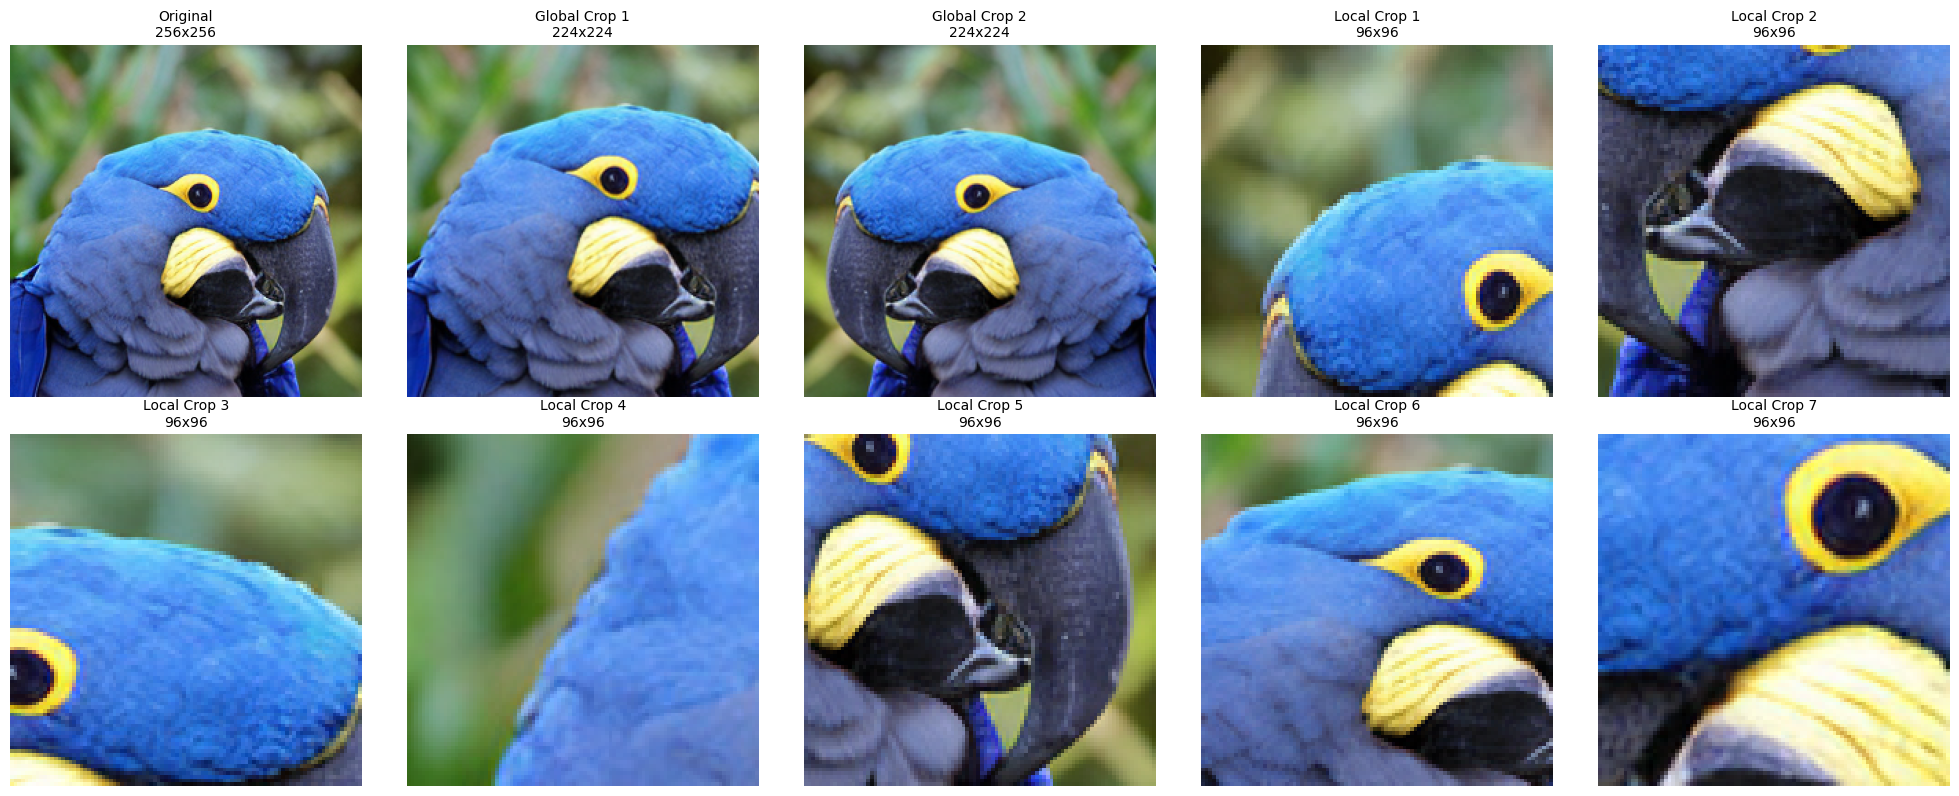


Generated:
  - 2 global crops (224x224)
  - 8 local crops (96x96)

Global crop scale: (0.32, 1.0)
Local crop scale: (0.05, 0.32)

All crops saved to: /root/dinov2/notebooks/crops


In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision import transforms
from torchvision.transforms import InterpolationMode

image_path = "/root/dinov2/dinov2/thirdparty/DiT/sample.png"

crops_dir = "/root/dinov2/notebooks/crops"
os.makedirs(crops_dir, exist_ok=True)
print(f"Created/using crops directory: {crops_dir}")

img = Image.open(image_path).convert('RGB')
print(f"Original image size: {img.size}")

# DINOv2 cropping parameters (from augmentations.py)
global_crops_scale = (0.32, 1.0)
local_crops_scale = (0.05, 0.32)
global_crops_size = 224
local_crops_size = 96
local_crops_number = 8

# Create geometric augmentations (same as DINOv2)
geometric_augmentation_global = transforms.Compose([
    transforms.RandomResizedCrop(
        global_crops_size, 
        scale=global_crops_scale, 
        interpolation=InterpolationMode.BICUBIC
    ),
    transforms.RandomHorizontalFlip(p=0.5),
])

geometric_augmentation_local = transforms.Compose([
    transforms.RandomResizedCrop(
        local_crops_size, 
        scale=local_crops_scale, 
        interpolation=InterpolationMode.BICUBIC
    ),
    transforms.RandomHorizontalFlip(p=0.5),
])

# Generate global crops (2 crops as in DINOv2)
global_crop_1 = geometric_augmentation_global(img)
global_crop_2 = geometric_augmentation_global(img)

# Generate local crops (8 crops as in DINOv2)
local_crops = [geometric_augmentation_local(img) for _ in range(local_crops_number)]

# Save global crops
global_crop_1_path = os.path.join(crops_dir, f"global_crop_1_{global_crops_size}x{global_crops_size}.png")
global_crop_2_path = os.path.join(crops_dir, f"global_crop_2_{global_crops_size}x{global_crops_size}.png")
global_crop_1.save(global_crop_1_path)
global_crop_2.save(global_crop_2_path)
print(f"Saved: {global_crop_1_path}")
print(f"Saved: {global_crop_2_path}")

# Save local crops
for i, local_crop in enumerate(local_crops):
    local_crop_path = os.path.join(crops_dir, f"local_crop_{i+1}_{local_crops_size}x{local_crops_size}.png")
    local_crop.save(local_crop_path)
    print(f"Saved: {local_crop_path}")

# Visualize
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Show original image
axes[0].imshow(img)
axes[0].set_title(f'Original\n{img.size[0]}x{img.size[1]}', fontsize=10)
axes[0].axis('off')

# Show global crops
axes[1].imshow(global_crop_1)
axes[1].set_title(f'Global Crop 1\n{global_crop_1.size[0]}x{global_crop_1.size[1]}', fontsize=10)
axes[1].axis('off')

axes[2].imshow(global_crop_2)
axes[2].set_title(f'Global Crop 2\n{global_crop_2.size[0]}x{global_crop_2.size[1]}', fontsize=10)
axes[2].axis('off')

# Show local crops
for i, local_crop in enumerate(local_crops[:7]):  # Show first 7 local crops
    axes[3 + i].imshow(local_crop)
    axes[3 + i].set_title(f'Local Crop {i+1}\n{local_crop.size[0]}x{local_crop.size[1]}', fontsize=10)
    axes[3 + i].axis('off')

plt.tight_layout()
plt.show()

print(f"\nGenerated:")
print(f"  - 2 global crops ({global_crops_size}x{global_crops_size})")
print(f"  - {local_crops_number} local crops ({local_crops_size}x{local_crops_size})")
print(f"\nGlobal crop scale: {global_crops_scale}")
print(f"Local crop scale: {local_crops_scale}")
print(f"\nAll crops saved to: {crops_dir}")

